# Video Games Sales Data Analysis

In this Jupyter notebook we will discuss on the sales of games all around the world, on diffrent types of platform , and the ratings given by the users and the critics.

This datasheet is a csv file which is downloaded from Kaggle [video-game-sales](https://www.kaggle.com/datasets/gregorut/videogamesales).

So here I'll be extracting some information from this datasheet which would be benificial in providing a good idea about the games sales, And the tools which I will be using are pandas, matplotlib, and seaborn to manage the datasheet and plot graphs out of it to visualize the data.

And all the tools mentioned above I have learned from --> [the course](http://zerotopandas.com).

## Downloading the Dataset

*Lets download the video games sales dataset from Kaggle.*


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./videogamesales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Video-games-sales-data-analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Data Preparation and Cleaning

*In this step we will be preparing the data sheet in most usable form by filtering and cleaning the data.* 



In [10]:
import pandas as pd

In [11]:
games_df = pd.read_csv(data_dir + '/vgsales.csv')

In [12]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


 ### There are total 16598 rows and 10 columns in this data sheet


In [13]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
games_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### There are 271 rows without Year

In [16]:
missing_years = (games_df[games_df['Year'].isna() == True])
missing_years

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [17]:
games_df = games_df.dropna()

In [18]:
games_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Rows without years has been removed 

In [19]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Exploratory Analysis and Visualization

 *Here we will be analysing the cleaned data and will plot some graphs for visualization.*



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Lets determine total global sales by genre

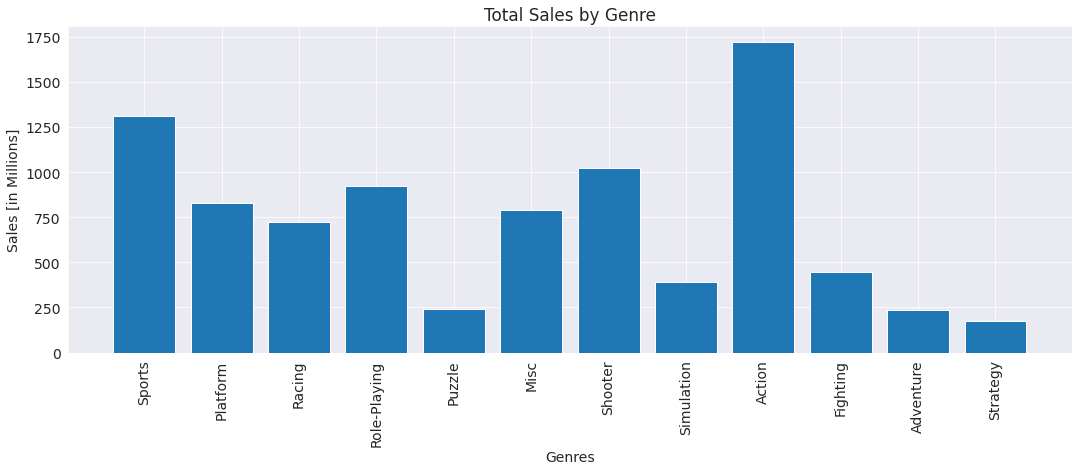

In [24]:
genre_list = games_df.Genre.unique().tolist()
sales_list = []
for genre in genre_list:
    sales_list.append(games_df[games_df.Genre == genre].Global_Sales.sum())

fig = plt.figure(figsize=(18,6))
plt.bar(genre_list, sales_list)
plt.xlabel('Genres')
plt.ylabel('Sales [in Millions]')
plt.title('Comparasion of sales for each Genres');
plt.xticks(rotation=90)
plt.title('Total Sales by Genre')
fig.show()

### From the above plot it can be seen that 'Action games' tops the list with around 1800 million sales.

### Now lets determine the regional sales per year.

In [25]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Text(0, 0.5, 'Global Sales')

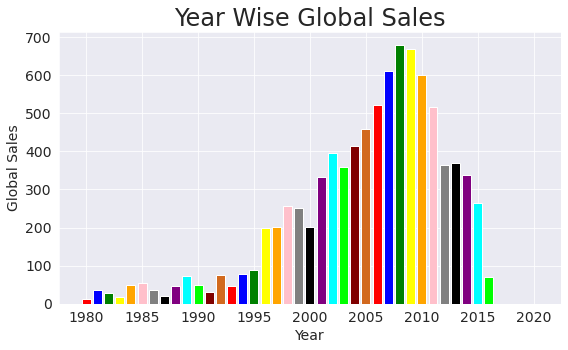

In [26]:
plt.title("Year Wise Global Sales",fontsize=24)
colours = ["red","blue","green","yellow","orange","pink","grey","black","purple","aqua","lime","maroon","chocolate"]
plt.bar(games_df['Year'].value_counts().sort_index().index,games_df.groupby("Year")['Global_Sales'].sum(),color=colours)
plt.xlabel("Year")
plt.ylabel("Global Sales")

### Now lets determine the top 10 Gaming Platforms Globally.

In [27]:
top_platforms = games_df['Platform'].value_counts().head(10).sort_values(ascending=False)
top_platforms

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

<AxesSubplot:title={'center':'Top 10 Platforms'}, xlabel='Game count', ylabel='Platform'>

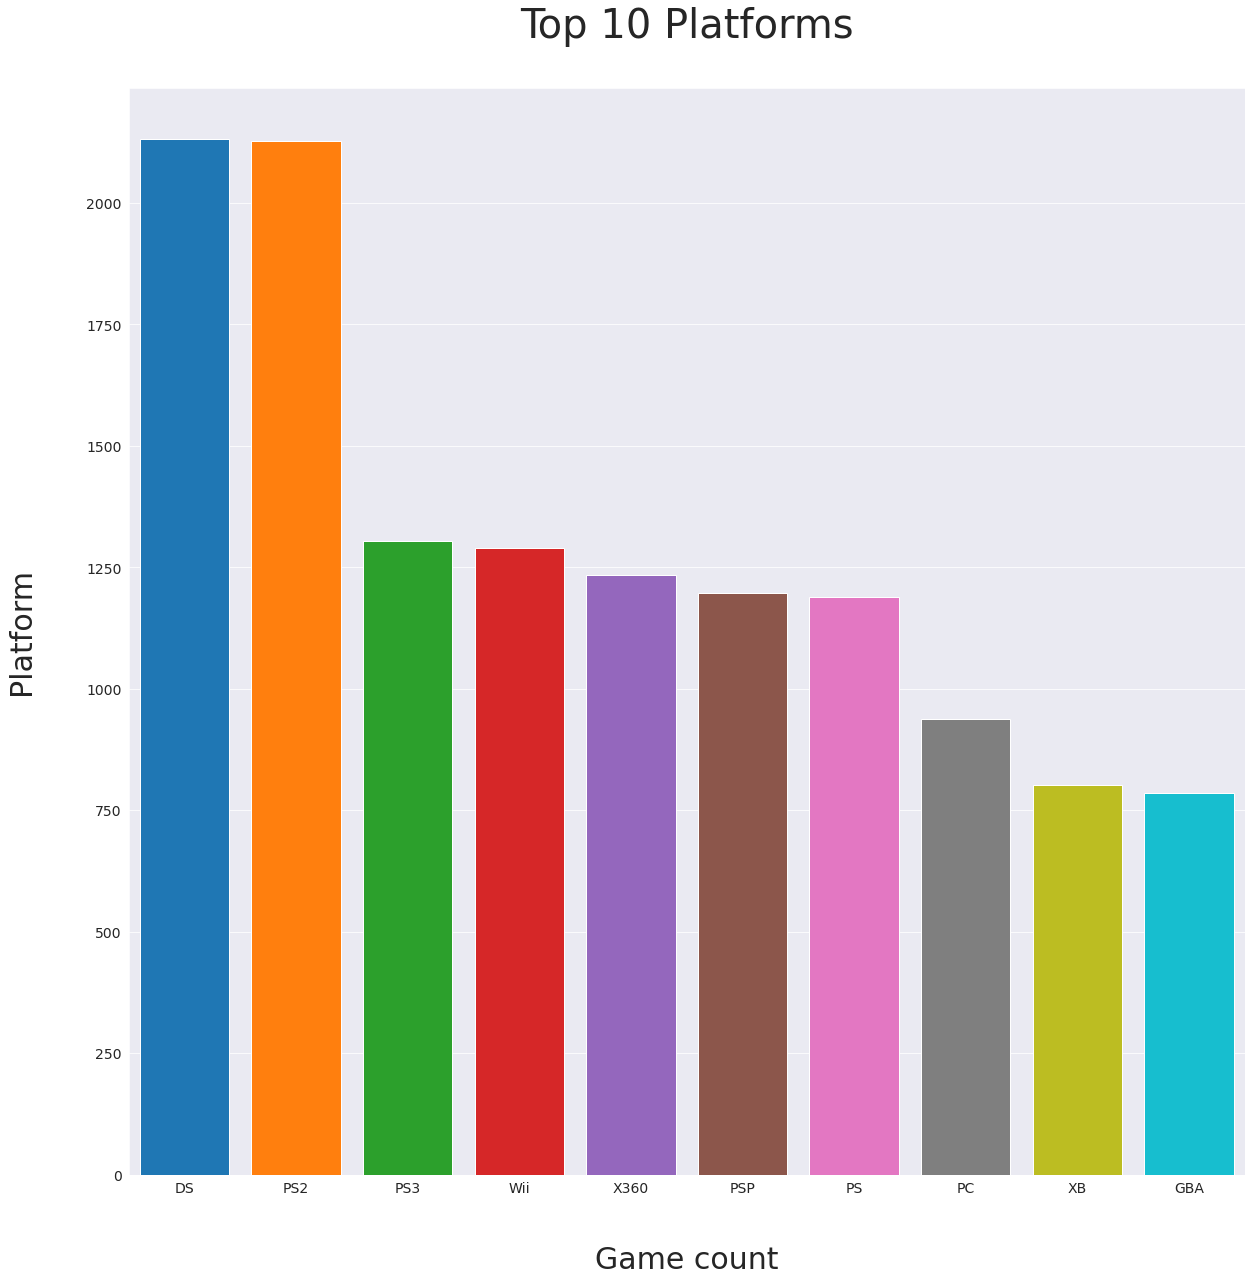

In [28]:
plt.figure(figsize=(20,20))
plt.title("Top 10 Platforms", pad=50, fontdict={'fontsize':40})
plt.xlabel("Game count", labelpad=50, fontdict={'fontsize':30})
plt.ylabel("Platform", labelpad=50, fontdict={'fontsize':30})

sns.barplot(y = top_platforms.values, x = top_platforms.index, saturation = 1)

### From the above plot it can be seen that 'PS2' and 'DS' tops the list with more than 2000 Games.

In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Asking and Answering Questions

#### In this section we'll be asking some questions for what we see in the dataset and answer them.



#### Q1 : What are the global sales of games between 1980-2020 ?

In [33]:
games_sales = games_df.groupby(['Year'])['Global_Sales'].sum()
games_sales

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Global Sales per Million')

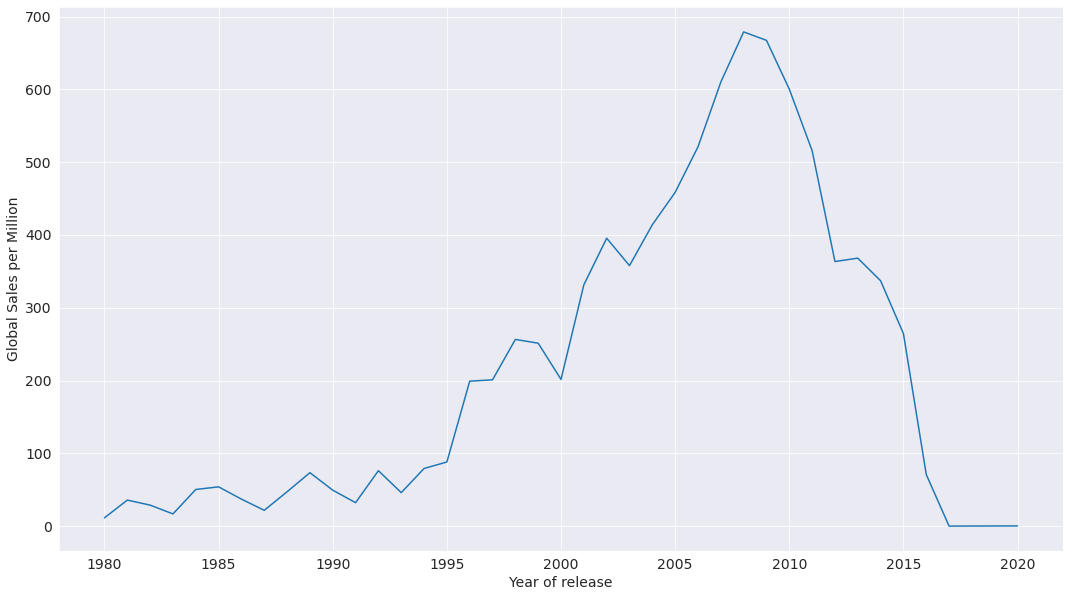

In [34]:
plt.figure(figsize=(18, 10))
plt.plot(games_sales);
plt.xlabel('Year of release')
plt.ylabel('Global Sales per Million')

### The above plot is about the Global sales per million from the year 1980-2020. We can see that the sales of games was increasing gradually till 1995, then after 1995 they increased exponentially for almost 10 years. And then from 2008 it dipped.

#### Q2: Which is the most used platforms for video games?

In [35]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [37]:
platforms = games_df['Platform'].value_counts()
platforms

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

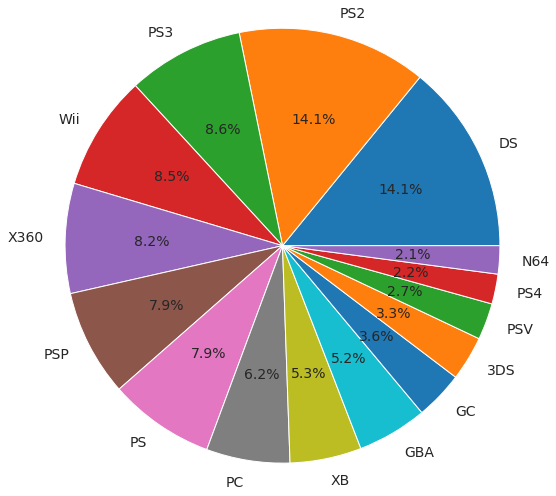

In [45]:
plt.pie(platforms.values[:15],labels=platforms.index[:15],autopct='%1.1f%%',radius=2);

### The above pie chart shows PS2 and DS are the most used platforms for video games.

#### Q3: Which genre has the most industry share?

In [46]:
genres = games_df['Genre'].value_counts()
genres

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

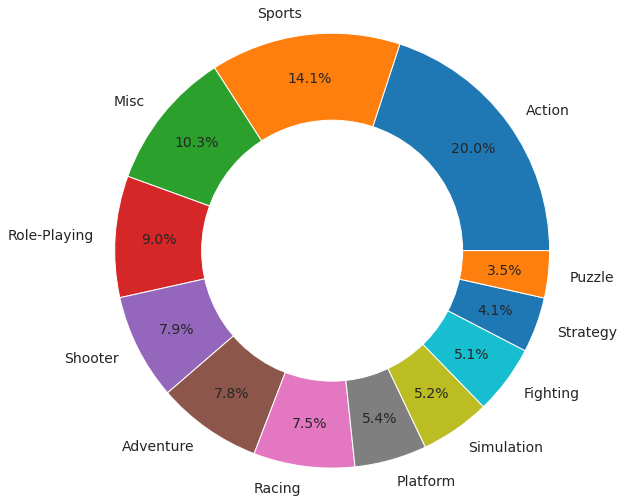

In [54]:
plt.pie(genres.values,labels=genres.index,autopct='%1.1f%%',radius=2,pctdistance=0.8);
circle = plt.Circle((0,0), radius=1.2, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle);

### The above donut graph shows that Action games has the highest industry share.

#### Q4: Which is the most common publisher of video games?

In [66]:
most_common_publisher_df = games_df['Publisher'].value_counts().head(10)

In [67]:
most_common_publisher_df

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

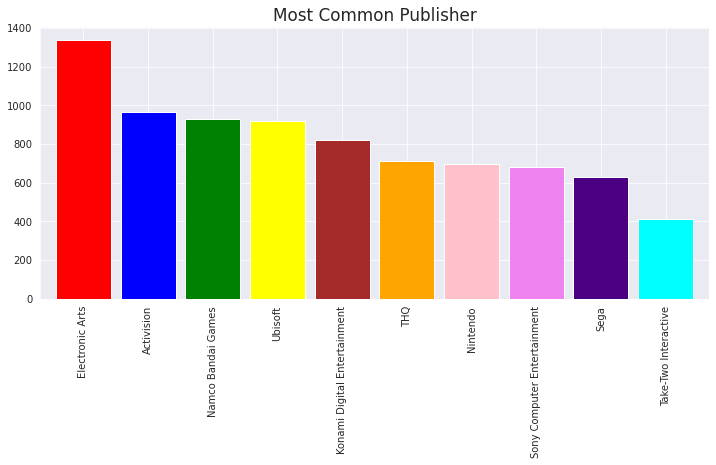

In [75]:
most_common_publisher_df.plot(kind='bar', figsize = (12,5),fontsize=10, grid=True, width=0.85,color=('red','blue','green','yellow','brown','orange','pink','violet','indigo','cyan','teal'));
plt.title('Most Common Publisher')
plt.show()

### From above graph it can be seen that Electronic Arts tops the list of most common publisher.

In [76]:
import jovian

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Inferences and Conclusion

#### Now lets conclude the analysed dataset of video games sales.

#### On the basis of the analysis of the video games sales dataset we can come to the following conclusions : 

- Highest global sales of video games topped around 680 million in the year 2008.
- PS2 and DS are the top video game platforms with more than 2000 games.
- Action games has the highest share in the video games industry with 20% of total shares.
- Electronic Arts is the most common publisher with more than 1300 games published.
- The sales of games was increasing gradually till 1995, then after 1995 they increased exponentially for almost 10 years. And   then from 2008 it dipped.

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## References and Future Work

This dataset has a lot of information about the sales trend of video games which can be further exploited to gain useful insights.

I would like to thank Jovian.ml for such an helpful course .


References:

- Kaggle Datasets : https://www.kaggle.com/datasets/gregorut/videogamesales
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [80]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>